In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from google.colab import drive
drivePath = '/content/drive'
drive.mount(drivePath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Identify original dataset

In [60]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Age-standardized prevalence of tobacco use among persons 15 years and older (%).csv")

# Identify structure of dataset
print("Dataset shape:", df.shape)
print("-" * 100)

# Identify data types
print("Dataset basic info:" )
print(df.info())
print("-" * 100)

# Preview dataset
print("Dataset preview:")
display(df.head(5))

Dataset shape: (5179, 15)
----------------------------------------------------------------------------------------------------
Dataset basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  5179 non-null   object 
 1   IND_CODE                5179 non-null   object 
 2   IND_UUID                5179 non-null   object 
 3   IND_PER_CODE            5179 non-null   object 
 4   DIM_TIME                5179 non-null   int64  
 5   DIM_TIME_TYPE           5179 non-null   object 
 6   DIM_GEO_CODE_M49        5179 non-null   int64  
 7   DIM_GEO_CODE_TYPE       5179 non-null   object 
 8   DIM_PUBLISH_STATE_CODE  5179 non-null   object 
 9   IND_NAME                5179 non-null   object 
 10  GEO_NAME_SHORT          5179 non-null   object 
 11  DIM_SEX                 5179 non-null   object 
 12 

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,PERCENT_POP_N,PERCENT_POP_NL,PERCENT_POP_NU
0,75DDA77M_Est_tob_curr_std,M_Est_tob_curr_std,75DDA77,M_Est_tob_curr_std,2000,YEAR,48,COUNTRY,PUBLISHED,Tobacco use,Bahrain,FEMALE,7.5,4.7,10.3
1,75DDA77M_Est_tob_curr_std,M_Est_tob_curr_std,75DDA77,M_Est_tob_curr_std,2000,YEAR,50,COUNTRY,PUBLISHED,Tobacco use,Bangladesh,FEMALE,48.6,38.8,58.4
2,75DDA77M_Est_tob_curr_std,M_Est_tob_curr_std,75DDA77,M_Est_tob_curr_std,2000,YEAR,51,COUNTRY,PUBLISHED,Tobacco use,Armenia,FEMALE,2.6,1.9,3.3
3,75DDA77M_Est_tob_curr_std,M_Est_tob_curr_std,75DDA77,M_Est_tob_curr_std,2000,YEAR,52,COUNTRY,PUBLISHED,Tobacco use,Barbados,FEMALE,3.7,2.1,5.2
4,75DDA77M_Est_tob_curr_std,M_Est_tob_curr_std,75DDA77,M_Est_tob_curr_std,2000,YEAR,56,COUNTRY,PUBLISHED,Tobacco use,Belgium,FEMALE,24.5,19.8,29.2


# Process original dataset

In [61]:
print("Columns:", list(df.columns))
print("-" * 100)

# Rename columns
df = df.rename(columns={
    'DIM_TIME': 'Year',
    'GEO_NAME_SHORT': 'Country',
    'DIM_SEX': 'Sex',
    'PERCENT_POP_N': 'Tobacco_use_percent',
    'PERCENT_POP_NL': 'Lower_CI',
    'PERCENT_POP_NU': 'Upper_CI'
})

# Removes unnecessary columns
df = df[['Country', 'Year', 'Sex', 'Tobacco_use_percent', 'Lower_CI', 'Upper_CI']]

# Preview renamed dataset
print("Renamed datase preview:")
display(df.head(5))

Columns: ['IND_ID', 'IND_CODE', 'IND_UUID', 'IND_PER_CODE', 'DIM_TIME', 'DIM_TIME_TYPE', 'DIM_GEO_CODE_M49', 'DIM_GEO_CODE_TYPE', 'DIM_PUBLISH_STATE_CODE', 'IND_NAME', 'GEO_NAME_SHORT', 'DIM_SEX', 'PERCENT_POP_N', 'PERCENT_POP_NL', 'PERCENT_POP_NU']
----------------------------------------------------------------------------------------------------
Renamed datase preview:


,Country,Year,Sex,Tobacco_use_percent,Lower_CI,Upper_CI
0,Bahrain,2000,FEMALE,7.5,4.7,10.3
1,Bangladesh,2000,FEMALE,48.6,38.8,58.4
2,Armenia,2000,FEMALE,2.6,1.9,3.3
3,Barbados,2000,FEMALE,3.7,2.1,5.2
4,Belgium,2000,FEMALE,24.5,19.8,29.2


In [62]:
# Calculate the number of unique countries
country_counts = (
    df.groupby('Year')['Country']
    .nunique()
    .reset_index(name='Country_count')
)
print("Number of unique countries:")
display(country_counts)
print("-" * 100)

# Remove abnormal data
df = df[df['Year'] != 2018]
print("Final number of unique countries:")
display(country_counts)

Number of unique countries:


,Year,Country_count
0,2000,172
1,2005,172
2,2007,172
3,2010,172
4,2015,172
5,2018,7
6,2020,172
7,2021,172
8,2022,172
9,2025,172


----------------------------------------------------------------------------------------------------
Final number of unique countries:


,Year,Country_count
0,2000,172
1,2005,172
2,2007,172
3,2010,172
4,2015,172
5,2018,7
6,2020,172
7,2021,172
8,2022,172
9,2025,172


In [63]:
# Process missing values
print("Missing values:")
print(df.isnull().sum())
print("-" * 100)
KeyColumns = ['Country', 'Year', 'Tobacco_use_percent']
if df[KeyColumns].isnull().any().any():
    print("Null values detected in key columns, dropping those rows")
    print("Null values removed")
    df = df.dropna(subset = KeyColumns)
else:
    print("No null values in key columns, skipping drop null")
    print("-" * 100)

# Remove duplicate row
DuplicateNum = df.duplicated().sum()
if DuplicateNum > 0:
    print("Detected {DuplicateNum} duplicate rows, removing duplicate rows")
    df = df.drop_duplicates()
    print("Duplicates removed")
else:
    print("No duplicate rows in dataset, skipping drop duplicates")

Missing values:
Country                  0
Year                     0
Sex                      0
Tobacco_use_percent      0
Lower_CI               189
Upper_CI               189
dtype: int64
----------------------------------------------------------------------------------------------------
No null values in key columns, skipping drop null
----------------------------------------------------------------------------------------------------
No duplicate rows in dataset, skipping drop duplicates


In [64]:
# Convert data types
df['Year'] = df['Year'].astype('category')
df['Tobacco_use_percent'] = df['Tobacco_use_percent'].astype(float)
df['Lower_CI'] = df['Lower_CI'].astype(float)
df['Upper_CI'] = df['Upper_CI'].astype(float)
df['Country'] = df['Country'].astype('category')
df['Sex'] = df['Sex'].astype('category')

# Sort data by country and year
df = df.sort_values(by=['Country', 'Year']).reset_index(drop=True)

# Add a new category column
bins = [0, 10, 25, 40, 100]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Tobacco_use_level'] = pd.cut(df['Tobacco_use_percent'], bins=bins, labels=labels, include_lowest=False)
df['Tobacco_use_level'] = df['Tobacco_use_level'].astype('category')

# Identify final dataset

In [65]:
# Display final dataset
print("Final dataset:")
df

Final dataset:


,Country,Year,Sex,Tobacco_use_percent,Lower_CI,Upper_CI,Tobacco_use_level
0,Afghanistan,2000,FEMALE,19.7,10.2,29.2,Medium
1,Afghanistan,2000,MALE,58.6,32.2,85.0,Very High
2,Afghanistan,2000,TOTAL,39.2,21.2,57.1,High
3,Afghanistan,2005,FEMALE,15.3,8.5,22.1,Medium
4,Afghanistan,2005,MALE,53.1,32.5,73.8,Very High
...,...,...,...,...,...,...,...
5153,Zimbabwe,2025,MALE,19.9,12.2,27.6,Medium
5154,Zimbabwe,2025,TOTAL,10.4,6.3,14.5,Medium
5155,Zimbabwe,2030,FEMALE,0.7,0.3,1.1,Low
5156,Zimbabwe,2030,MALE,17.8,9.6,25.9,Medium


In [66]:
# Identify structure of final dataset
print("Final dataset shape:", df.shape)
print("-" * 100)

# Identify final data types
print("Final dataset info:")
print(df.info())
print("-" * 100)

# Identify final columns
print("Unique years:", sorted(df['Year'].unique()))
print("Unique sexes:", df['Sex'].unique())
print("Number of unique countries:", df['Country'].nunique())

Final dataset shape: (5158, 7)
----------------------------------------------------------------------------------------------------
Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158 entries, 0 to 5157
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              5158 non-null   category
 1   Year                 5158 non-null   category
 2   Sex                  5158 non-null   category
 3   Tobacco_use_percent  5158 non-null   float64 
 4   Lower_CI             4969 non-null   float64 
 5   Upper_CI             4969 non-null   float64 
 6   Tobacco_use_level    5148 non-null   category
dtypes: category(4), float64(3)
memory usage: 152.3 KB
None
----------------------------------------------------------------------------------------------------
Unique years: [2000, 2005, 2007, 2010, 2015, 2020, 2021, 2022, 2025, 2030]
Unique sexes: ['FEMALE', 'MALE', 'TOTAL']
Categ

In [67]:
# Identify numerical variables
display(df.describe())
print("Average tobacco use rate:", df['Tobacco_use_percent'].mean())
print("Maximum tobacco use rate:", df['Tobacco_use_percent'].max())
print("Minimum tobacco use rate:", df['Tobacco_use_percent'].min())
print("-" * 100)

AvgValue = df['Tobacco_use_percent'].mean()
MaxValue = df['Tobacco_use_percent'].max()
MinValue = df['Tobacco_use_percent'].min()

# Find data with maximum tobacco use rate
MaxRow = df[df['Tobacco_use_percent'] == MaxValue]
print("Data with maximum tobacco use rate:")
display(MaxRow)
print("-" * 100)

# Find data with minimum tobacco use rate
MinRow = df[df['Tobacco_use_percent'] == MinValue]
print("Data with minimum tobacco use rate:")
display(MinRow)

,Tobacco_use_percent,Lower_CI,Upper_CI
count,5158.000000,4969.000000,4969.000000
mean,22.862602,17.036687,28.648179
std,15.182969,11.962763,18.820769
min,0.000000,0.000000,0.000000
25%,10.700000,7.400000,13.700000
50%,21.600000,15.800000,27.000000
75%,32.500000,24.500000,40.500000
max,84.400000,66.000000,100.000000


Average tobacco use rate: 22.862601783637068
Maximum tobacco use rate: 84.4
Minimum tobacco use rate: 0.0
----------------------------------------------------------------------------------------------------
Data with maximum tobacco use rate:


,Country,Year,Sex,Tobacco_use_percent,Lower_CI,Upper_CI,Tobacco_use_level
4529,Timor-Leste,2000,MALE,84.4,65.5,100.0,Very High


----------------------------------------------------------------------------------------------------
Data with minimum tobacco use rate:


,Country,Year,Sex,Tobacco_use_percent,Lower_CI,Upper_CI,Tobacco_use_level
1350,Democratic People's Republic of Korea,2000,FEMALE,0.0,0.0,0.0,NaN
1353,Democratic People's Republic of Korea,2005,FEMALE,0.0,0.0,0.0,NaN
1356,Democratic People's Republic of Korea,2007,FEMALE,0.0,0.0,0.0,NaN
1359,Democratic People's Republic of Korea,2010,FEMALE,0.0,0.0,0.0,NaN
1362,Democratic People's Republic of Korea,2015,FEMALE,0.0,0.0,0.0,NaN
1365,Democratic People's Republic of Korea,2020,FEMALE,0.0,0.0,0.0,NaN
1368,Democratic People's Republic of Korea,2021,FEMALE,0.0,0.0,0.0,NaN
1371,Democratic People's Republic of Korea,2022,FEMALE,0.0,0.0,0.0,NaN
1374,Democratic People's Republic of Korea,2025,FEMALE,0.0,0.0,0.0,NaN
1377,Democratic People's Republic of Korea,2030,FEMALE,0.0,0.0,0.0,NaN


In [68]:
# Find data of male in the Democratic People's Republic of Korea
DPRKMale = df[(df['Country'] == "Democratic People's Republic of Korea") & (df['Sex'] == "MALE")]
print("Data of male in the Democratic People's Republic of Korea:")
display(DPRKMale)

Data of male in the Democratic People's Republic of Korea:


,Country,Year,Sex,Tobacco_use_percent,Lower_CI,Upper_CI,Tobacco_use_level
1351,Democratic People's Republic of Korea,2000,MALE,58.9,37.5,80.4,Very High
1354,Democratic People's Republic of Korea,2005,MALE,51.7,35.8,67.5,Very High
1357,Democratic People's Republic of Korea,2007,MALE,48.9,34.8,63.1,Very High
1360,Democratic People's Republic of Korea,2010,MALE,45.3,34.1,56.6,Very High
1363,Democratic People's Republic of Korea,2015,MALE,39.7,31.1,48.3,High
1366,Democratic People's Republic of Korea,2020,MALE,34.8,25.9,43.6,High
1369,Democratic People's Republic of Korea,2021,MALE,33.9,25.2,42.6,High
1372,Democratic People's Republic of Korea,2022,MALE,33.0,23.7,42.3,High
1375,Democratic People's Republic of Korea,2025,MALE,30.7,20.7,40.7,High
1378,Democratic People's Republic of Korea,2030,MALE,27.3,15.6,39.0,High


# Visualization

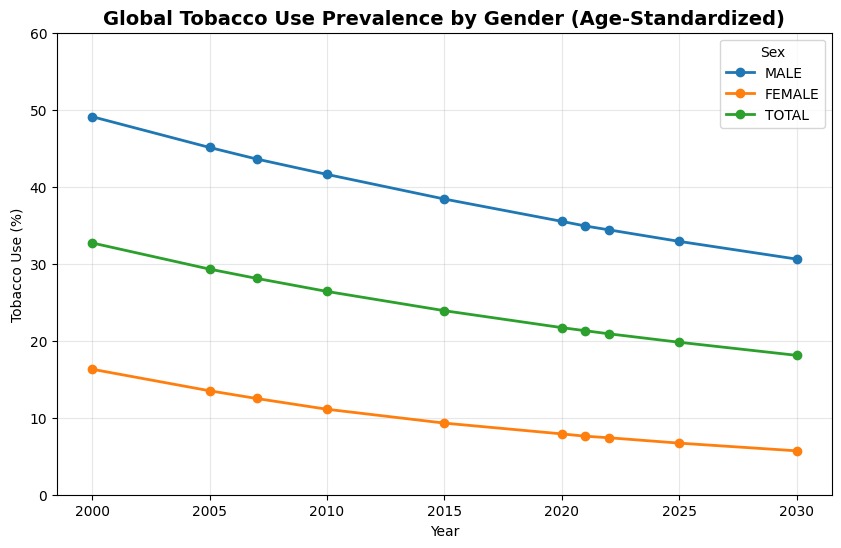

In [69]:
# Line Chart – Global Trend by Gender
GlobalTrend = df[df['Country'] == 'World']

plt.figure(figsize=(10, 6))

for sex in ['MALE', 'FEMALE', 'TOTAL']:
    subset = GlobalTrend[GlobalTrend['Sex'] == sex]
    plt.plot(subset['Year'], subset['Tobacco_use_percent'],
             marker='o', linewidth=2, markersize=6, label=sex)

plt.title('Global Tobacco Use Prevalence by Gender (Age-Standardized)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Tobacco Use (%)')
plt.grid(True, alpha=0.3)
plt.legend(title='Sex')
plt.ylim(0, 60)
plt.show()

<Figure size 1000x600 with 0 Axes>

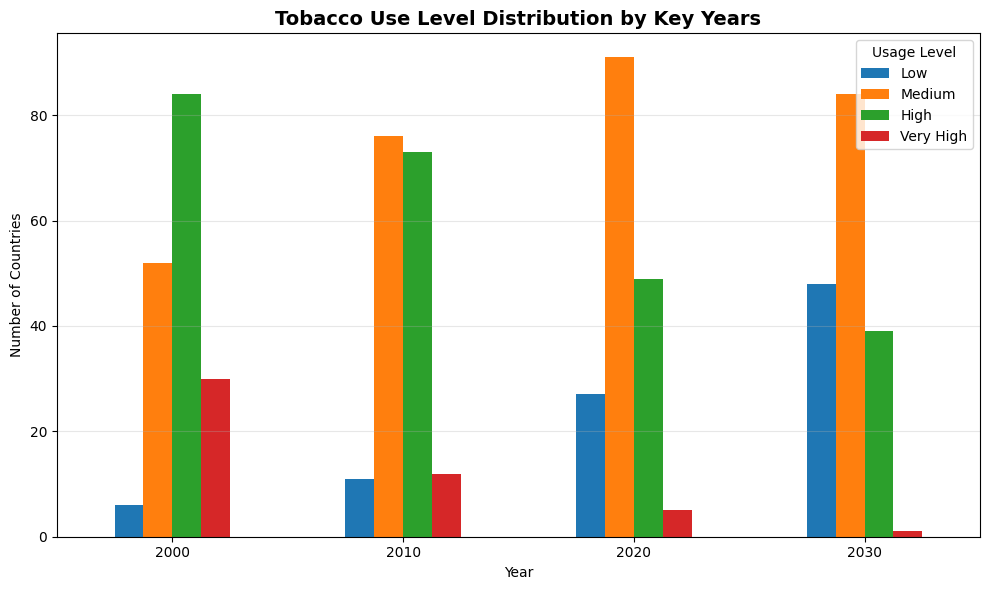

In [70]:
# Bar Chart – Level Comparison by Key Years
KeyYears = [2000, 2010, 2020, 2030]
FilteredData = df[(df['Sex'] == 'TOTAL') & (df['Year'].isin(KeyYears))]

CategoryData = pd.crosstab(FilteredData['Year'], FilteredData['Tobacco_use_level'])

AllCategories = ['Low', 'Medium', 'High', 'Very High']
for category in AllCategories:
    if category not in CategoryData.columns:
        CategoryData[category] = 0

CategoryData = CategoryData[AllCategories]

plt.figure(figsize=(10, 6))
CategoryData.plot(kind='bar', figsize=(10, 6))
plt.title('Tobacco Use Level Distribution by Key Years', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='Usage Level', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

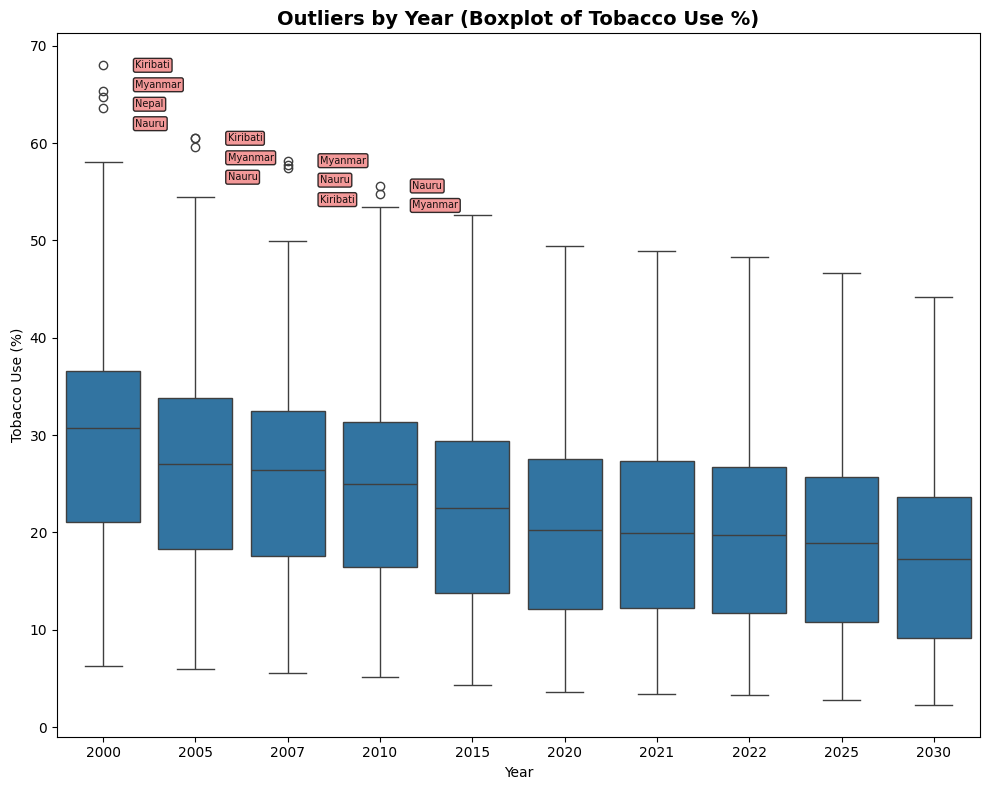

Outlier countries data:
 Year  Country  TobaccoUsePercent  UpperBound
 2000 Kiribati               68.0     59.8875
 2000  Myanmar               65.4     59.8875
 2000    Nepal               64.7     59.8875
 2000    Nauru               63.6     59.8875
 2005 Kiribati               60.5     57.0500
 2005  Myanmar               60.5     57.0500
 2005    Nauru               59.6     57.0500
 2007  Myanmar               58.2     54.9500
 2007    Nauru               57.8     54.9500
 2007 Kiribati               57.4     54.9500
 2010    Nauru               55.6     53.5375
 2010  Myanmar               54.8     53.5375


In [76]:
# Boxplot – Country Distribution and Outliers with Data Export
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[df['Sex']=='TOTAL'], x='Year', y='Tobacco_use_percent')

Years = sorted(df[df['Sex']=='TOTAL']['Year'].unique())
OutliersList = []

for i, year in enumerate(Years):
    YearData = df[(df['Sex']=='TOTAL') & (df['Year'] == year)]

    Q1 = YearData['Tobacco_use_percent'].quantile(0.25)
    Q3 = YearData['Tobacco_use_percent'].quantile(0.75)
    IQR = Q3 - Q1
    UpperBound = Q3 + 1.5 * IQR

    outliers = YearData[YearData['Tobacco_use_percent'] > UpperBound].sort_values('Tobacco_use_percent', ascending=False)

    for _, outlier in outliers.iterrows():
        OutliersList.append({
            'Year': year,
            'Country': outlier['Country'],
            'TobaccoUsePercent': outlier['Tobacco_use_percent'],
            'UpperBound': UpperBound
        })

    if not outliers.empty:
        xpos = i + 0.35
        ystart = outliers['Tobacco_use_percent'].max()

        for j, (_, outlier) in enumerate(outliers.iterrows()):
            ypos = ystart - j * 2
            plt.text(xpos, ypos, outlier['Country'], fontsize=7, alpha=0.9,
                    ha='left', va='center',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='lightcoral', alpha=0.8))

plt.title("Outliers by Year (Boxplot of Tobacco Use %)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Tobacco Use (%)")
plt.tight_layout()
plt.show()

# Display outlier data
if OutliersList:
    OutliersDf = pd.DataFrame(OutliersList)
    print("Outlier countries data:")
    print(OutliersDf.to_string(index=False))
else:
    print("No outliers found in the dataset")

# Declaration (mandatory, please complete the following)

I did  knowingly use generative AI tools in this assignment task

# Acknowledgment
If you did use any generative AI tools, please complete the following acknowledgment:

* In this assignment, I followed the University’s guidelines for students on academic integrity. No content generated by generative AI tools has been presented as my own work. I take responsibility for the work submitted.

* **Process**: In my assignment preparation, I acknowledge the use of generative AI tools to help explain Python syntax and correct my answer for help me understand unfamilar syntax and find the most appropriate solution.

* **Record**: I have kept a record of my use of AI tools, including the specific tool(s) used, the prompts submitted, and responses generated.

I understand that my teachers may ask me to provide this information.

# Appendix (mandatory)
Report below your prompts with a brief description of their usage.

- **Prompt**: "Help me re-optimize the labeling of outlier countries"  
**Usage**: Requested advanced visualization adjustment to display country names vertically in boxplots without overlapping text

- **Prompt**: "Explain how to read a boxplot"  
**Usage**: Asked for fundamental explanation of boxplot interpretation including median, IQR, and outlier identification

- **Prompt**: "Merge these two code segments and remove redundant parts"  
**Usage**: Asked for code optimization through consolidation of duplicate functionality

- **Prompt**: "Are there any policy impacts in reality?"  
**Usage**: Inquired about real-world policy implications behind observed tobacco use patterns

- **Prompt**: "Add visualization comparing smoking rate categories across key years"  
**Usage**: Requested categorical analysis showing low/medium/high usage trends over time

- **Prompt**: "Find complete row data for statistical extremes"  
**Usage**: Asked for detailed extraction of records containing minimum, maximum and average values

- **Prompt**: "Remove all rows from 2018"  
**Usage**: Requested data filtering to exclude specific year for temporal analysis consistency

- **Prompt**: "Make this passage flow more smoothly"  
**Usage**: Required language polishing for improved readability of technical descriptions